m: 9.8730
b, 1.8812
Cost: 28.9544


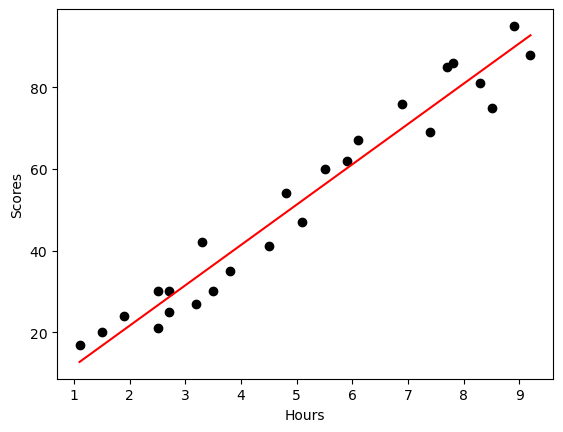

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("student_scores.csv")

def compute_cost(y_true, y_pred):
    n = len(y_true)
    return (1/n) * np.sum((y_true - y_pred)**2)

def linearRegression(m_now, b_now, points, L):
    m_grad = 0
    b_grad = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i].Hours
        y = points.iloc[i].Scores
        m_grad += -(2/n) * x * (y - (m_now * x + b_now))
        b_grad += -(2/n) * (y - (m_now * x + b_now))
    m_new = m_now - L * m_grad
    b_new = b_now - L * b_grad
    return m_new, b_new

m, b = 0, 0
L = 0.0001     #
epochs = 1000  


for i in range(epochs):
    m, b = linearRegression(m, b, data, L)
    if i % 100 == 0:
        y_pred_epoch = m * data.Hours.values + b
        cost_epoch = compute_cost(data.Scores.values, y_pred_epoch)

print(f"m: {m:.4f}")
print(f"b, {b:.4f}")
print(f"Cost: {cost_epoch:.4f}")

plt.scatter(data.Hours, data.Scores, color="black")
x_vals = np.linspace(data.Hours.min(), data.Hours.max(), 100)
y_vals = m * x_vals + b
plt.plot(x_vals, y_vals, color="red")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()
